LINEAR MODEL
---

This is  a linear model to predict the age of employees leaving  a company.<br/>
Used the dataset provided by OneCampus Academy in the model building.<br/>

STEPS TAKEN FROM DATA IMPORTATION, EXPLORATORY ANALYSIS TO MODEL BUILDING
---
After getting the data to my jupyter notebook, there were no missing data and so proceeded on to check the cardinality  on categorical data frm the dataset.<br/>
Correlation amongst the features to be used as my feature matrix were not highly correlated hence did not drop any features due to multicollinearity<br/>



In [1]:
#importing the necessary python libraries in building a linear model and data wrangle
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sb
from pandas import set_option
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline

#warnings.SimpleFitter(action="ignore", category=FutureWarning)


In [2]:
#my wrangle function to help avoid repetition in the codeset
def wrangle(filepath):
    #importing the dataset
    df = pd.read_csv(filepath)
    
    #dropping features with low/high cardinality
    df.drop(
        columns=["EmployeeCount", "EmployeeNumber", 
                 "MonthlyIncome", "MonthlyRate", "Over18", "StandardHours"],
        inplace=True
    )
    
    
    #dropping features that constituting leakage could interfere with the model's performance
    df.drop(
        columns=["YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion",
                 "YearsWithCurrManager"],
        inplace=True
    )
    
    #dropping multicollinear features
    df.drop(
        columns=["TotalWorkingYears", "PerformanceRating"],
        inplace=True
    )
    return df

In [3]:
data = wrangle("./WA_Fn-UseC_-HR-Employee-Attrition.csv")
print(data.shape)

(1470, 23)


In [4]:
data.select_dtypes("object")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [6]:
# checking for missing data
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
RelationshipSatisfaction    0
StockOptionLevel            0
TrainingTimesLastYear       0
WorkLifeBalance             0
dtype: int64

In [7]:
# checking for cardinality in my data and dropping columns with very high/low cadinality
print(data.columns)
data["BusinessTravel"].nunique()

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance'],
      dtype='object')


3

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

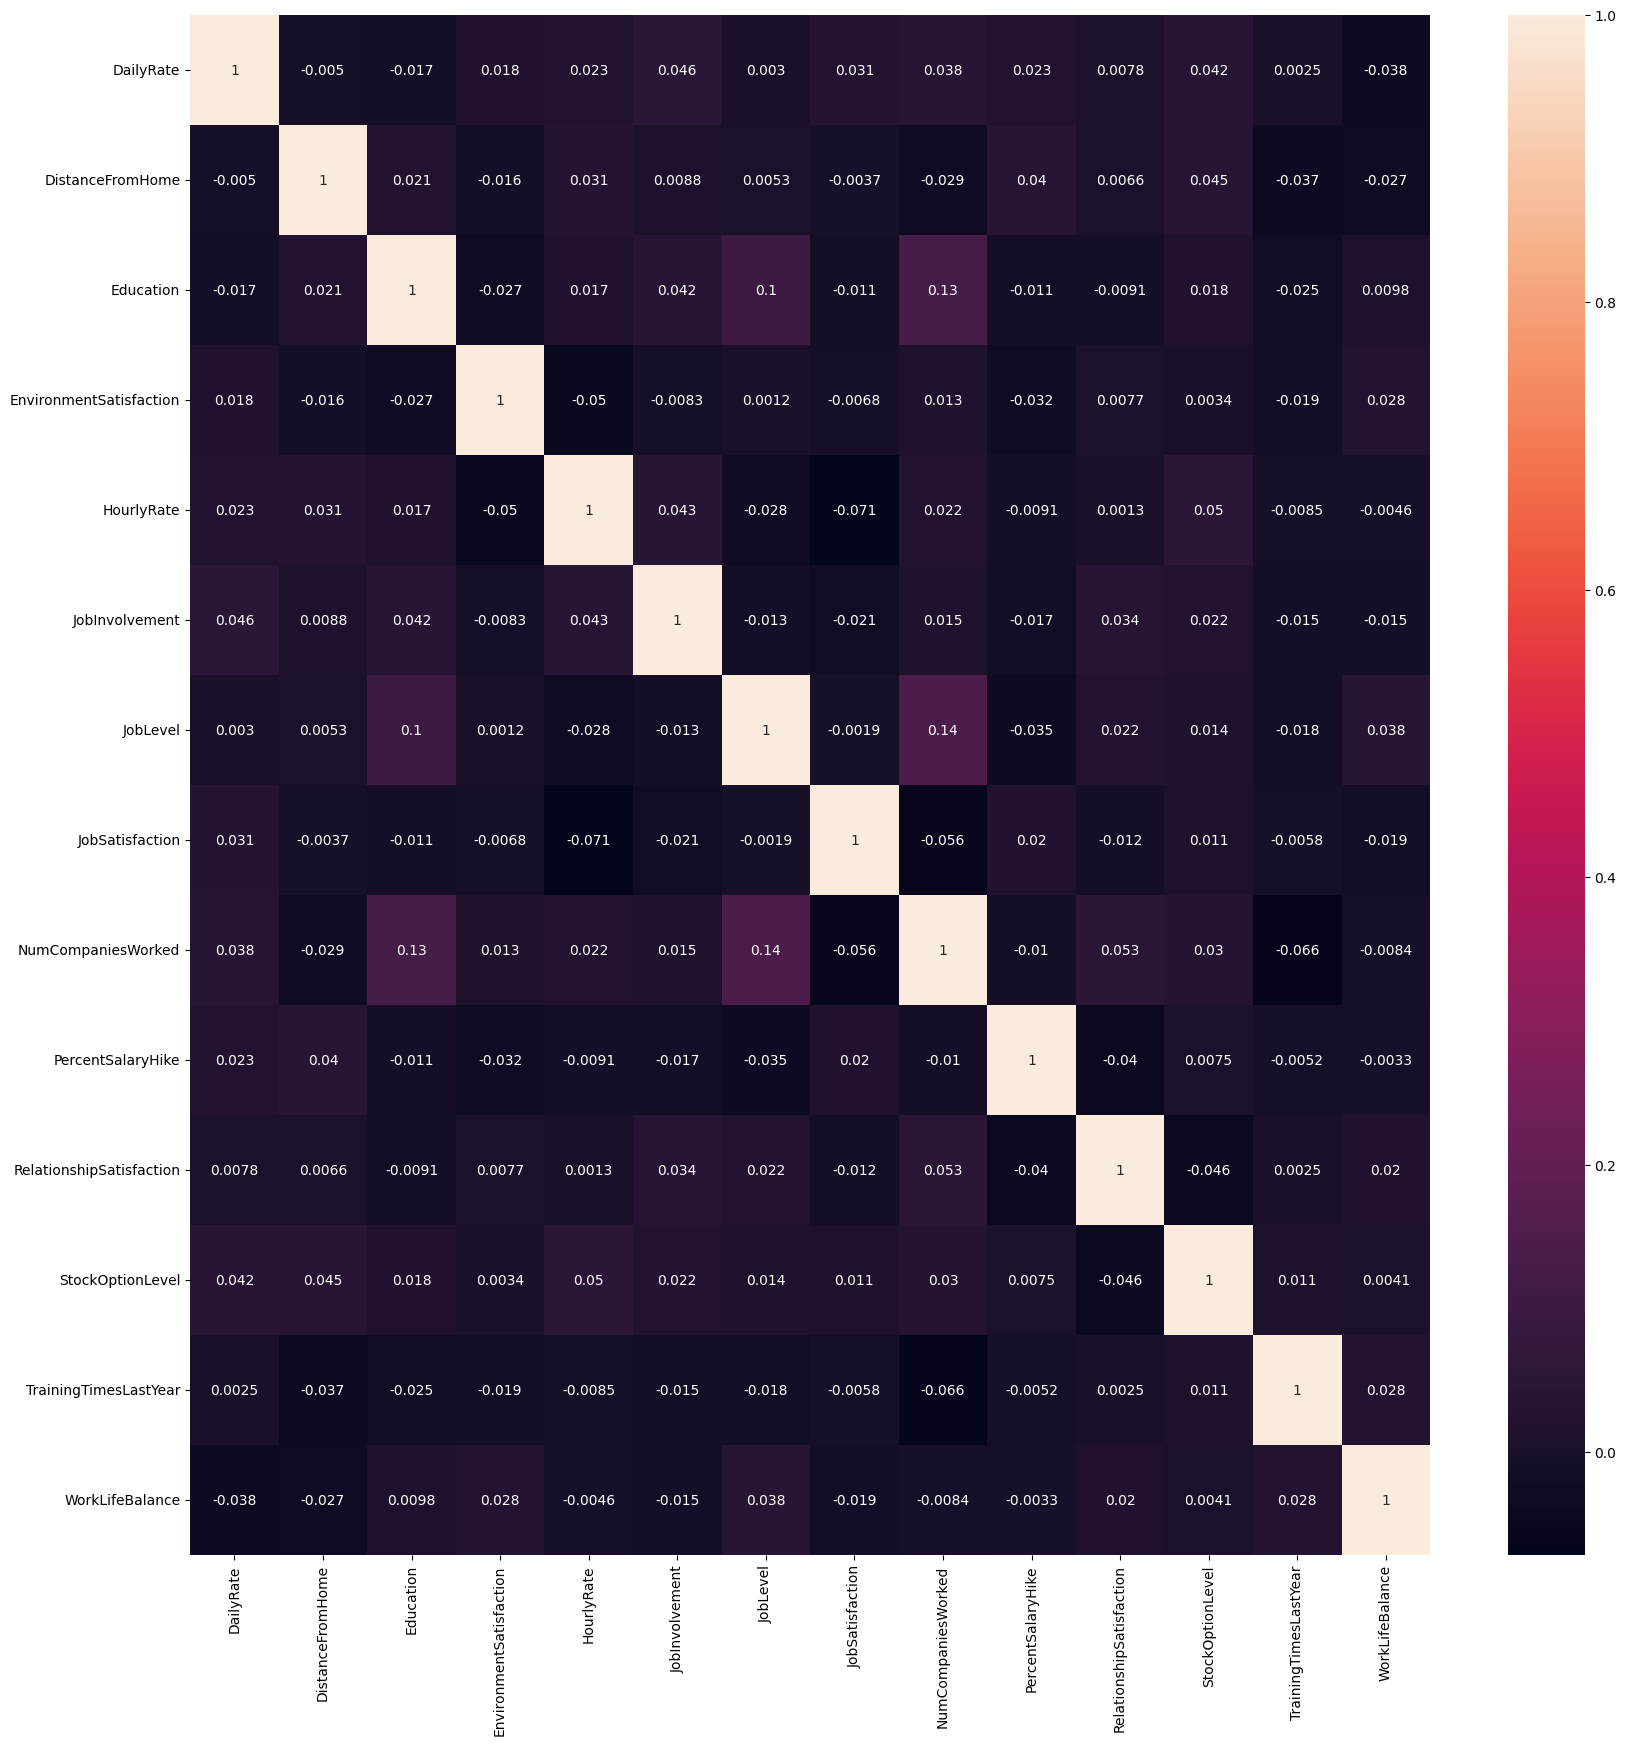

In [9]:
#checking for multicollinearity amongst the numerical features
df1 = data.select_dtypes("number").drop(columns="Age")
set_option('display.width', 100)
plt.figure(figsize = (20,20))
sb.heatmap(df1.corr(), annot=True);

In [10]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,Sales Executive,4,Single,8,Yes,11,1,0,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,Research Scientist,2,Married,1,No,23,4,1,3,3
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,Laboratory Technician,3,Single,6,Yes,15,2,0,3,3
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,Research Scientist,3,Married,1,Yes,11,3,0,3,3
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,Laboratory Technician,2,Married,9,No,12,4,1,3,3


In [11]:
data.select_dtypes("number")

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance
0,41,1102,1,2,2,94,3,2,4,8,11,1,0,0,1
1,49,279,8,1,3,61,2,2,2,1,23,4,1,3,3
2,37,1373,2,2,4,92,2,1,3,6,15,2,0,3,3
3,33,1392,3,4,4,56,3,1,3,1,11,3,0,3,3
4,27,591,2,1,1,40,3,1,2,9,12,4,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,4,17,3,1,3,3
1466,39,613,6,1,4,42,2,3,1,4,15,1,1,5,3
1467,27,155,4,3,2,87,4,2,2,1,20,2,1,0,3
1468,49,1023,2,3,4,63,2,2,2,2,14,4,0,3,2


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

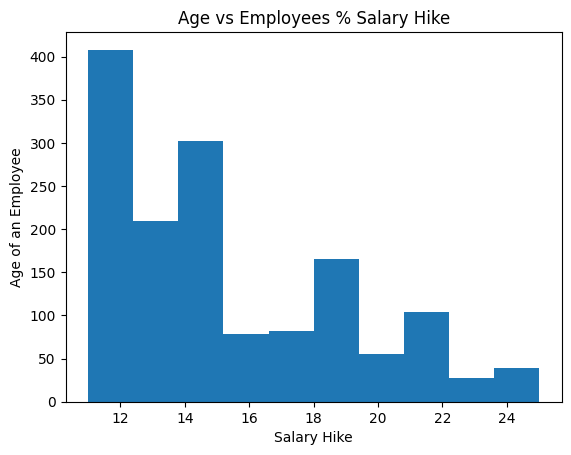

In [13]:
plt.hist(data["PercentSalaryHike"])
plt.xlabel("Salary Hike")
plt.ylabel("Age of an Employee")
plt.title("Age vs Employees % Salary Hike");